In [1]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se importa el dataframe de exportaciones previamente limpiado
df = pd.read_csv(r"/content/drive/MyDrive/Data/soya.csv")

In [3]:
df.shape

(363, 10)

In [4]:
df.columns

Index(['YEAR', 'MONTH', 'PIB_USD_MILL', 'PROD_SOJA_TON', 'COMM_ACEITE_USD_TON',
       'VALOR_FOB_ACEITE', 'KILBRU_ACEITE', 'VALOR_FOB_TORTA', 'KILBRU_TORTA',
       'COMM_HARINA_USD_TON'],
      dtype='object')

In [5]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
df = df.set_index('DATE')
df['KILBRU_ACEITE'] = df['KILBRU_ACEITE'].div(1000)
df['KILBRU_TORTA'] = df['KILBRU_TORTA'].div(1000)
df = df.fillna(0)
df

,YEAR,MONTH,PIB_USD_MILL,PROD_SOJA_TON,COMM_ACEITE_USD_TON,VALOR_FOB_ACEITE,KILBRU_ACEITE,VALOR_FOB_TORTA,KILBRU_TORTA,COMM_HARINA_USD_TON
DATE,,,,,,,,,,
1992-01-01,1992,1,307.670824,0.0000,420.421,304451.00,365.72000,1089250.00,4657.4640,175.8
1992-02-01,1992,2,306.133843,0.0000,424.389,430771.00,509.26800,3240782.00,14997.0480,174.1
1992-03-01,1992,3,304.517081,0.0000,446.436,646738.00,771.85000,1795147.00,6022.4300,178.7
1992-04-01,1992,4,347.020861,257568.2249,430.121,595243.00,690.99000,2976684.00,11647.6440,172.9
1992-05-01,1992,5,344.642308,0.0000,454.152,169422.00,204.61000,940598.00,5608.2950,183.2
...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,548.686376,0.0000,1305.901,40984407.67,31678.49497,54870921.57,157040.5602,348.8
2021-12-01,2021,12,547.891754,0.0000,1216.078,48378799.14,37251.65072,52564625.61,151537.5928,411.7
2022-01-01,2022,1,497.048641,0.0000,1336.033,46848965.67,36930.82491,67724077.75,187975.7982,418.9


In [6]:
df_torta = df.loc[:,['MONTH', 'PIB_USD_MILL', 'COMM_HARINA_USD_TON',
       'KILBRU_TORTA', 'VALOR_FOB_TORTA']]

In [8]:
df_torta_test = df_torta['VALOR_FOB_TORTA'].to_frame()[326:]

In [ ]:
#df_torta = df.loc[:,['MONTH', 'PIB_USD_MILL', 'COMM_HARINA_USD_TON',
#                     'KILBRU_TORTA', 'VALOR_FOB_TORTA']]

Text(0.5, 1.0, 'Correlation Heatmap')

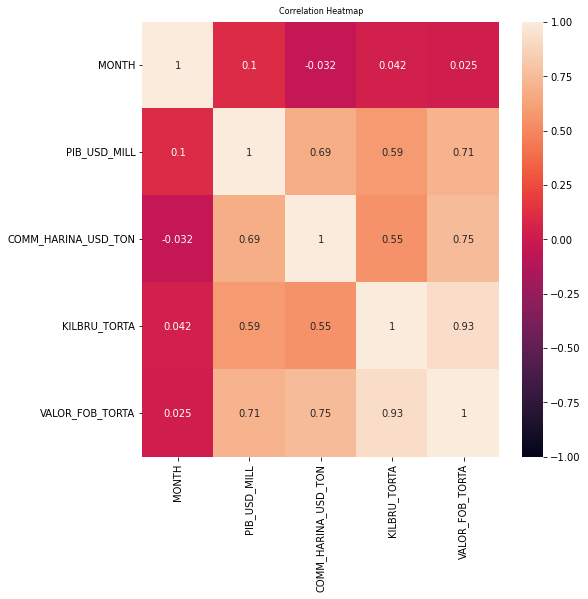

In [9]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df_torta.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=8)

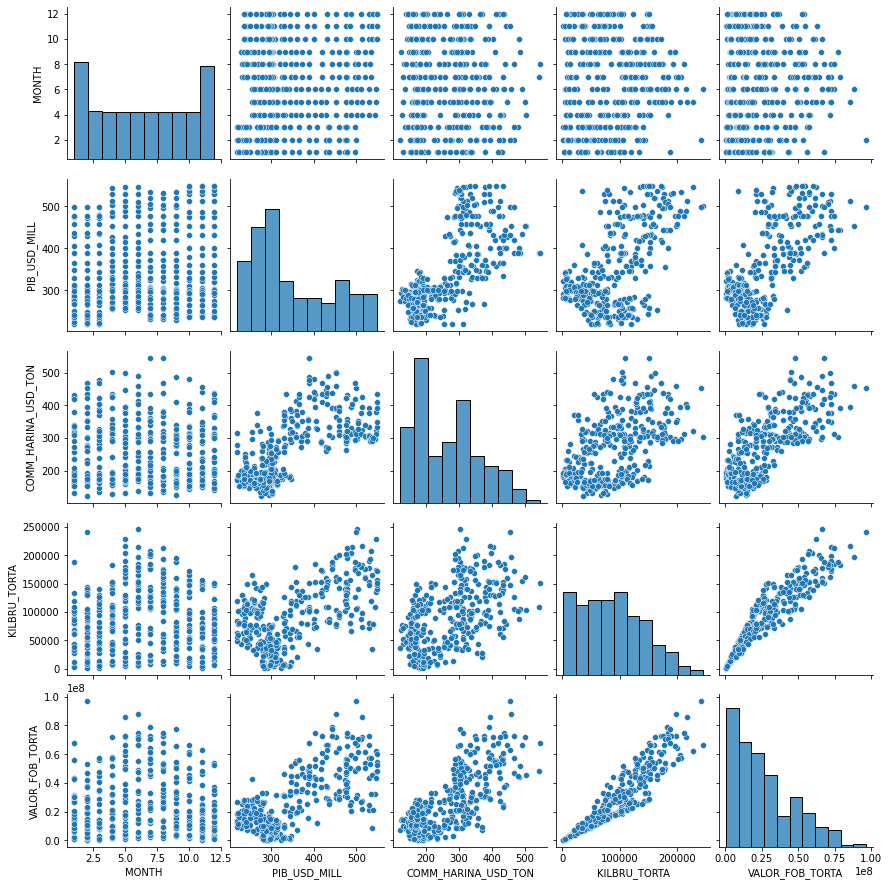

In [10]:
sns.pairplot(df_torta)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
df_torta_s = scaler.fit_transform(df_torta)

In [13]:
scaler.scale_

array([3.46260938e+00, 9.41087910e+01, 9.61441440e+01, 5.52584359e+04,
       2.08041011e+07])

In [14]:
def df_to_X_y(df, window_size=4):
  df_as_np = df#.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][4]
    y.append(label)
  return np.array(X), np.array(y)

In [15]:
X, y = df_to_X_y(df_torta_s,window_size=3)
X.shape, y.shape

((360, 3, 5), (360,))

In [16]:
X_train, y_train = X[:287], y[:287] # hasta 0.8
X_val, y_val = X[287:323], y[287:323] #0.8 a 0.9
X_test, y_test = X[323:], y[323:] #0.9 para adelante

In [17]:
y_test

array([ 0.40696626,  0.30471014,  1.73840443,  1.03025535,  1.50507285,
        1.27788239,  0.28982791,  0.91566422, -0.83384421, -0.25159214,
        0.18423785,  0.50830506,  0.70145566,  0.52391924,  1.10879727,
        0.77859818,  1.47517051,  0.62446439,  0.34771733,  0.82720461,
        1.0608754 ,  1.33509305,  1.43685376,  1.30490363,  1.03702182,
        2.19859777,  2.86375886,  2.1120787 ,  2.11061463,  1.69205387,
        1.1647537 ,  1.63255991,  1.37414921,  1.26329146,  1.9919676 ,
        3.38333996,  1.48782588])

In [18]:
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import *

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [19]:
model_1 = Sequential()
model_1.add(InputLayer((3,5)))
model_1.add(LSTM(100, return_sequences=True))
model_1.add(LSTM(50))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, 'linear'))
model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 100)            42400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,929
Trainable params: 75,929
Non-trainable params: 0
_________________________________________________________________


In [20]:
cp_1 = ModelCheckpoint('model_1/', save_best_only=True)

In [21]:
model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0, callbacks=[cp_1])

In [22]:
model_1 = load_model('model_1/')

In [23]:
def postprocess(arr):
  arr = (arr*scaler.scale_[4]) + scaler.mean_[4]
  return arr

In [24]:
def plot_predictions(model, X, y):
  predictions = model.predict(X).flatten()
  preds = postprocess(predictions)
  actuals= postprocess(y)
  df = pd.DataFrame(data={'Predictions': preds,
                          'Actuals':actuals})
  plt.figure(figsize=(15, 5))
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  return df

9/9 [==============================] - 1s 3ms/step


,Predictions,Actuals
0,4435264.0,2976684.00
1,4901918.0,940598.00
2,3362230.0,1408650.00
3,1918464.0,2257401.00
4,1076376.0,3192607.00
...,...,...
282,44235800.0,41371337.81
283,37942048.0,46500498.28
284,33958280.0,35340321.95
285,30097846.0,29676852.51


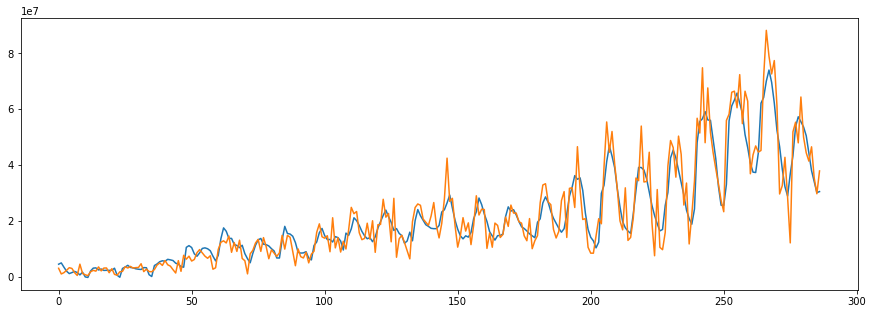

In [25]:
post_processed_df = plot_predictions(model_1, X_train, y_train)
post_processed_df

In [26]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 6129690.13.


In [27]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.36.


In [28]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.89.


2/2 [==============================] - 0s 7ms/step


,Predictions,Actuals
0,36761616.0,28835782.91
1,51051724.0,27016165.76
2,49700552.0,59290718.08
3,57400992.0,72189827.90
4,63852872.0,72746415.10
5,62943144.0,74631803.30
6,57057456.0,65759895.69
7,48771884.0,50341175.97
8,43006144.0,24632147.56
9,37128676.0,20266220.16


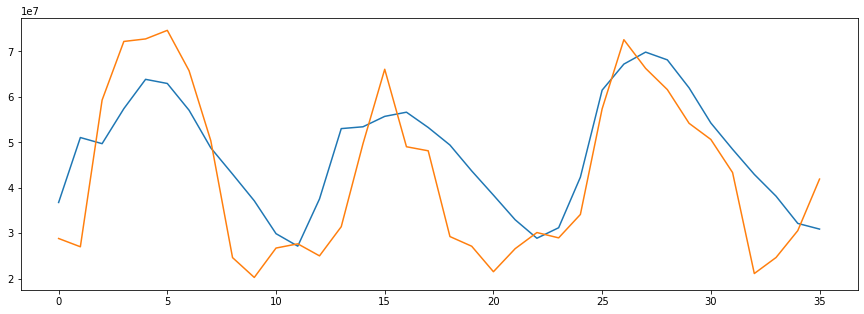

In [29]:
post_processed_df = plot_predictions(model_1, X_val, y_val)
post_processed_df

In [30]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 11507100.11.


In [31]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.29.


In [32]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.57.


2/2 [==============================] - 0s 7ms/step


,Predictions,Actuals
0,42367248.0,34749549.69
1,59718000.0,32622202.94
2,56977016.0,62448923.90
3,60031008.0,47716518.95
4,59731936.0,57594670.11
5,56591200.0,52868176.93
6,51716080.0,32312591.58
7,46594160.0,45332553.36
8,42086344.0,8935602.98
9,36282596.0,21048834.09


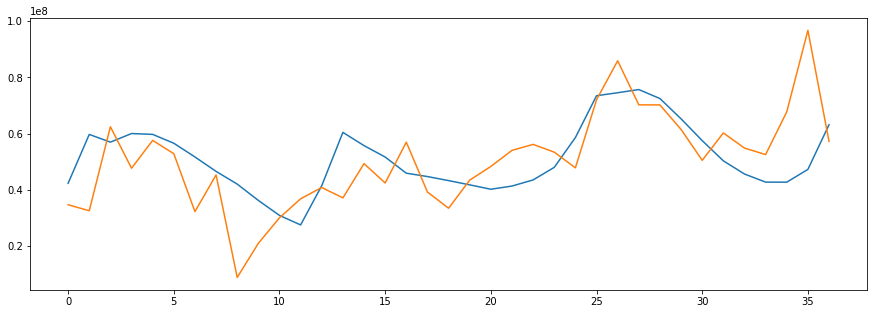

In [33]:
ltsm_predictions = plot_predictions(model_1, X_test, y_test)
df_torta_test['lstm'] = ltsm_predictions['Predictions'].to_list()
ltsm_predictions

In [35]:
ltsm_rmse = np.sqrt(mean_squared_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['lstm']))
print("The root mean squared error is {:.2f}.".format(ltsm_rmse))

The root mean squared error is 14555798.17.


In [36]:
ltsm_mape = mean_absolute_percentage_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['lstm'])
print("The Mean absolute percentage error is {:.2f}.".format(ltsm_mape))

The Mean absolute percentage error is 0.31.


In [37]:
ltsm_r2 = r2_score(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['lstm'])
print("The coefficient of determination is {:.2f}.".format(ltsm_r2))

The coefficient of determination is 0.25.


In [38]:
model_2 = Sequential()
model_2.add(InputLayer((3,5)))
model_2.add(Conv1D(100, kernel_size=2, activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, 'linear'))
model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 100)            1100      
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,565
Trainable params: 7,565
Non-trainable params: 0
_________________________________________________________________


In [39]:
cp_2 = ModelCheckpoint('model_2/', save_best_only=True)

In [40]:
model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200 , callbacks=[cp_2], verbose=0)

In [41]:
model_2 = load_model('model_2/')

9/9 [==============================] - 0s 2ms/step


,Predictions,Actuals
0,3771690.0,2976684.00
1,2865568.0,940598.00
2,2141236.0,1408650.00
3,596466.0,2257401.00
4,348756.0,3192607.00
...,...,...
282,43033432.0,41371337.81
283,37620396.0,46500498.28
284,35064808.0,35340321.95
285,28744260.0,29676852.51


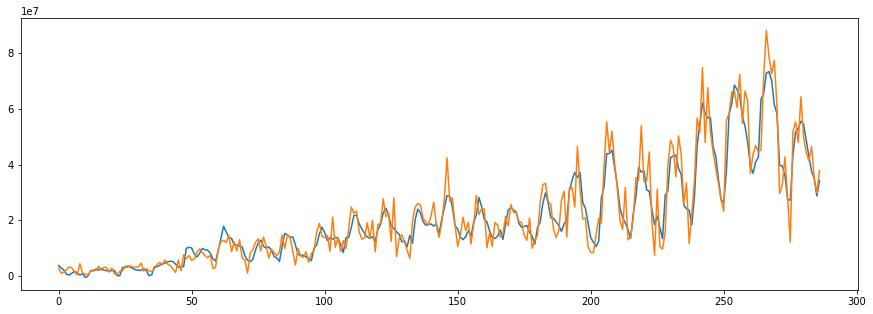

In [42]:
post_processed_df = plot_predictions(model_2, X_train, y_train)
post_processed_df

In [43]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 5477556.52.


In [44]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.32.


In [45]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.91.


2/2 [==============================] - 0s 4ms/step


,Predictions,Actuals
0,27996606.0,28835782.91
1,47866500.0,27016165.76
2,45680260.0,59290718.08
3,56375680.0,72189827.90
4,63528144.0,72746415.10
5,64376928.0,74631803.30
6,55522680.0,65759895.69
7,48506288.0,50341175.97
8,43312120.0,24632147.56
9,38321924.0,20266220.16


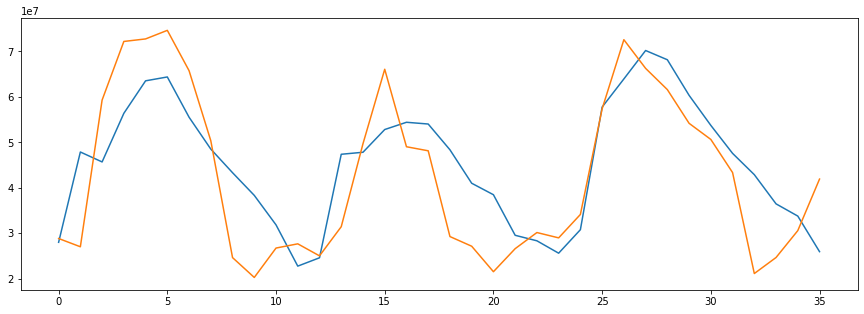

In [46]:
post_processed_df = plot_predictions(model_2, X_val, y_val)
post_processed_df

In [47]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 10986650.86.


In [48]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.27.


In [49]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.61.


2/2 [==============================] - 0s 7ms/step


,Predictions,Actuals
0,29593910.0,34749549.69
1,55816152.0,32622202.94
2,53410096.0,62448923.90
3,57839104.0,47716518.95
4,59110992.0,57594670.11
5,53886536.0,52868176.93
6,49074716.0,32312591.58
7,45208640.0,45332553.36
8,42713656.0,8935602.98
9,28030040.0,21048834.09


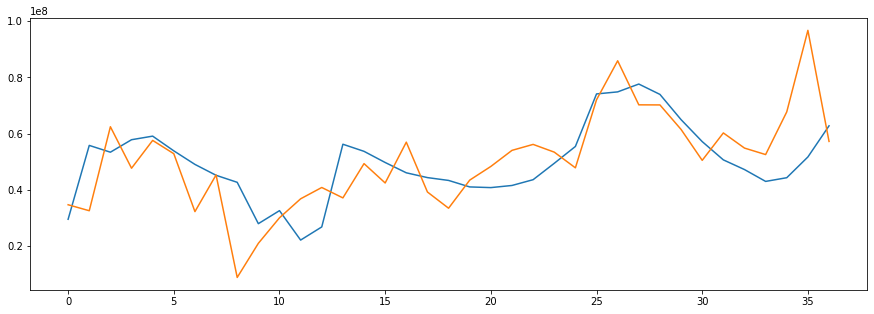

In [50]:
conv1d_predictions = plot_predictions(model_2, X_test, y_test)
df_torta_test['conv1d'] = conv1d_predictions['Predictions'].to_list()
conv1d_predictions

In [51]:
conv1d_rmse = np.sqrt(mean_squared_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['conv1d']))
print("The root mean squared error is {:.2f}.".format(conv1d_rmse))

The root mean squared error is 13610622.33.


In [52]:
conv1d_mape = mean_absolute_percentage_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['conv1d'])
print("The Mean absolute percentage error is {:.2f}.".format(conv1d_mape))

The Mean absolute percentage error is 0.29.


In [53]:
conv1d_r2 = r2_score(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['conv1d'])
print("The coefficient of determination is {:.2f}.".format(conv1d_r2))

The coefficient of determination is 0.34.


In [54]:
model_3 = Sequential()
model_3.add(InputLayer((3,5)))
model_3.add(GRU(100))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, 'linear'))
model_3.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               32100     
                                                                 
 dense_4 (Dense)             (None, 32)                3232      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,365
Trainable params: 35,365
Non-trainable params: 0
_________________________________________________________________


In [55]:
cp_3 = ModelCheckpoint('model_3/', save_best_only=True)

In [56]:
model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp_3], verbose=0)

In [57]:
model_3 = load_model('model_3/')

9/9 [==============================] - 0s 3ms/step


,Predictions,Actuals
0,6998362.0,2976684.00
1,7168498.0,940598.00
2,6601630.0,1408650.00
3,6333208.0,2257401.00
4,5874000.0,3192607.00
...,...,...
282,41613416.0,41371337.81
283,35374136.0,46500498.28
284,32949702.0,35340321.95
285,28964458.0,29676852.51


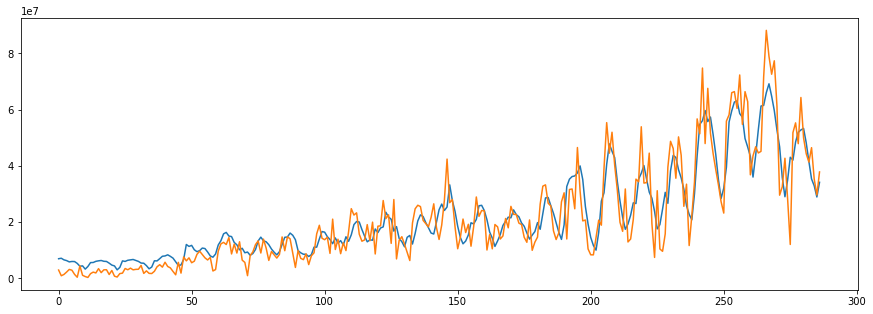

In [58]:
post_processed_df = plot_predictions(model_3, X_train, y_train)
post_processed_df

In [59]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 7094818.24.


In [60]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.65.


In [61]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.85.


2/2 [==============================] - 0s 5ms/step


,Predictions,Actuals
0,42366228.0,28835782.91
1,47192612.0,27016165.76
2,45943008.0,59290718.08
3,54362992.0,72189827.90
4,61388848.0,72746415.10
5,61000408.0,74631803.30
6,56452512.0,65759895.69
7,49605688.0,50341175.97
8,42281520.0,24632147.56
9,32599568.0,20266220.16


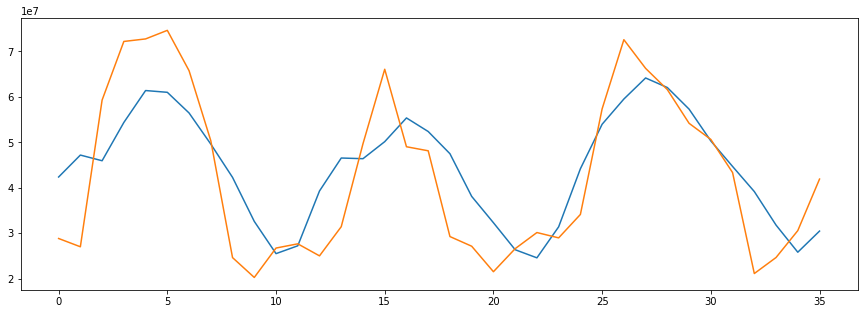

In [62]:
post_processed_df = plot_predictions(model_3, X_val, y_val)
post_processed_df

In [63]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 10727203.68.


In [64]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.26.


In [65]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.63.


2/2 [==============================] - 0s 11ms/step


,Predictions,Actuals
0,45897120.0,34749549.69
1,53055480.0,32622202.94
2,50478720.0,62448923.90
3,56443264.0,47716518.95
4,54994076.0,57594670.11
5,54160632.0,52868176.93
6,49253084.0,32312591.58
7,41003768.0,45332553.36
8,37960200.0,8935602.98
9,27939878.0,21048834.09


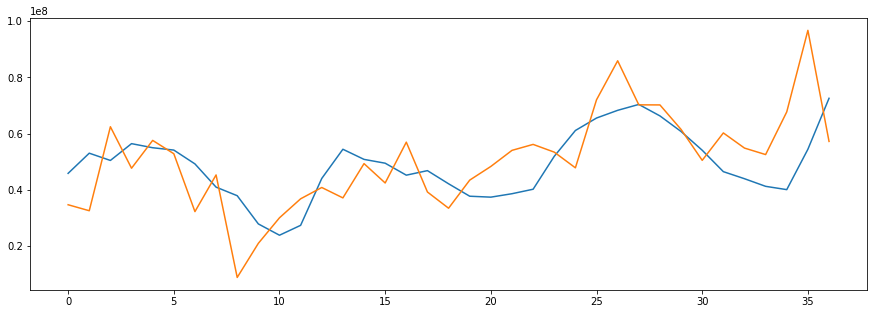

In [66]:
gru_predictions = plot_predictions(model_3, X_test, y_test)
df_torta_test['gru'] = gru_predictions['Predictions'].to_list()
gru_predictions

In [67]:
gru_rmse = np.sqrt(mean_squared_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['gru']))
print("The root mean squared error is {:.2f}.".format(gru_rmse))

The root mean squared error is 13887175.03.


In [68]:
gru_mape = mean_absolute_percentage_error(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['gru'])
print("The Mean absolute percentage error is {:.2f}.".format(gru_mape))

The Mean absolute percentage error is 0.29.


In [69]:
gru_r2 = r2_score(df_torta_test['VALOR_FOB_TORTA'], df_torta_test['gru'])
print("The coefficient of determination is {:.2f}.".format(gru_r2))

The coefficient of determination is 0.32.


In [70]:
plt.style.use('fivethirtyeight')

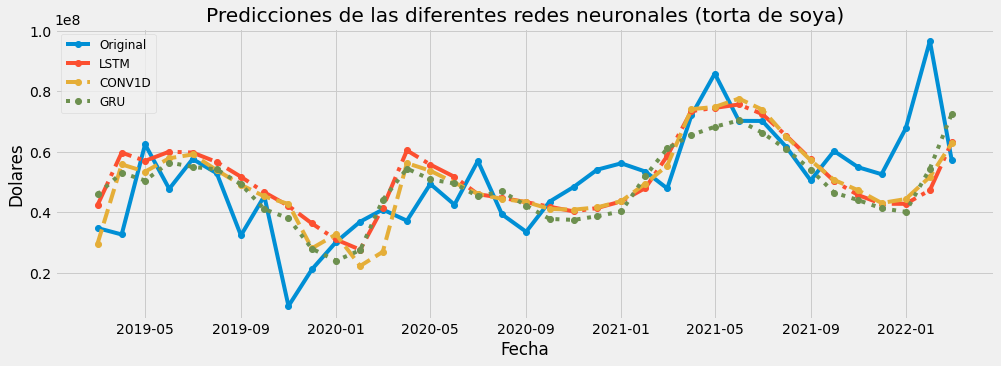

In [71]:
df_torta_test
fig, axes = plt.subplots(figsize=(15, 5))
axes.plot_date(df_torta_test.index, df_torta_test['VALOR_FOB_TORTA'], label='Original', linestyle='-')
axes.plot_date(df_torta_test.index, df_torta_test['lstm'], label='LSTM', linestyle='-.')
axes.plot_date(df_torta_test.index, df_torta_test['conv1d'], label='CONV1D', linestyle='--')
axes.plot_date(df_torta_test.index, df_torta_test['gru'], label='GRU', linestyle=':')
axes.legend(fontsize=12)
axes.set_xlabel('Fecha')
axes.set_ylabel('Dolares')
plt.title('Predicciones de las diferentes redes neuronales (torta de soya)')
plt.show()


In [89]:
rmse_errors = np.round([ltsm_rmse, conv1d_rmse, gru_rmse], 3)
mape_errors = np.round([ltsm_mape, conv1d_mape, gru_mape], 3)
r2_errors = np.round([ltsm_r2, conv1d_r2, gru_r2], 3)
errors = pd.DataFrame({'Modelos': ['LTSM', 'CONV1D', 'GRU'], 'RMSE Errors': rmse_errors, 'MAPE Errors': mape_errors, 'R2 Errors': r2_errors})
errors

,Modelos,RMSE Errors,MAPE Errors,R2 Errors
0,LTSM,1.455580e+07,0.308,0.249
1,CONV1D,1.361062e+07,0.294,0.343
2,GRU,1.388718e+07,0.294,0.316


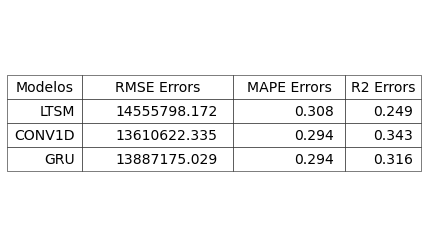

In [90]:
fig, ax = plt.subplots() 
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=errors.values, 
                      #rowLabels=rows, 
                      #rowColours=colors, 
                      colLabels=errors.columns, 
                      loc='center', 
                 colWidths=[0.2, 0.4, 0.3, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.show() 